In [1]:
from dictionary.node import Node
from dictionary.word_frequency import WordFrequency
from dictionary.base_dictionary import BaseDictionary
from dictionary.list_dictionary import ListDictionary
from dictionary.hashtable_dictionary import HashTableDictionary
from dictionary.ternarysearchtree_dictionary import TernarySearchTreeDictionary

# data generation from provided kaggle file

In [2]:
words_frequencies_from_file = []
data_file = open('sampleData200k.txt', 'r')
for line in data_file:
    values = line.split()
    word = values[0]
    frequency = int(values[1])
    word_frequency = WordFrequency(word, frequency)  # each line contains a word and its frequency
    words_frequencies_from_file.append(word_frequency)
data_file.close()

words_frequencies_from_file_list=words_frequencies_from_file[:50000]
words_frequencies_from_file_hash=words_frequencies_from_file[50000:100000]
words_frequencies_from_file_tst=words_frequencies_from_file[100000:150000]

In [3]:
import time
import random

# scenario 1

In [4]:
test_samples = [0, 50, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

output_list_time_add_ns = []
agent1 = ListDictionary()

for i in range(10):
    init_time = time.time_ns()
    for wf in words_frequencies_from_file_list[test_samples[i]:test_samples[i+1]]:
        agent1.add_word_frequency(wf)                                            
    output_list_time_add_ns.append(time.time_ns() - init_time)


[0.0,
 0.0069825,
 0.0159547,
 0.0638584,
 0.4318433,
 1.5358916,
 6.3071216,
 10.2795029,
 14.9001393,
 19.4968381]

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Time taken (ns)')

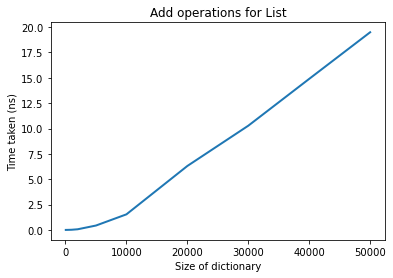

In [35]:
inputs = [50, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]
plt.plot(inputs, output_list_time_add_s, linewidth=2, markersize=12)
plt.title("Add operations for List")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")

In [7]:
test_samples = [0, 50, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

output_hash_time_add_ns = []
agent2 = HashTableDictionary()

for i in range(10):
    init_time = time.time_ns()
    for wf in words_frequencies_from_file_hash[test_samples[i]:test_samples[i+1]]:
        agent2.add_word_frequency(wf)                                            
    output_hash_time_add_ns.append(time.time_ns() - init_time)

[0.0,
 0.0,
 0.0,
 0.0,
 0.001974,
 0.0020142,
 0.0029945,
 0.0039866,
 0.004987,
 0.003995]

Text(0, 0.5, 'Time taken (ns)')

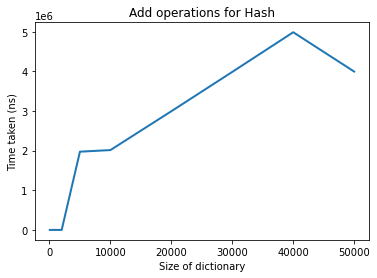

In [37]:
inputs = [50, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]
plt.plot(inputs, output_hash_time_add_ns, linewidth=2, markersize=12)
plt.title("Add operations for Hash")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")

In [9]:
test_samples = [0, 50, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

output_tst_time_add_ns = []
agent3 = TernarySearchTreeDictionary()

for i in range(10):
    init_time = time.time_ns()
    for wf in words_frequencies_from_file_tst[test_samples[i]:test_samples[i+1]]:
        agent3.add_word_frequency(wf)                                            
    output_tst_time_add_ns.append(time.time_ns() - init_time)

[0.0378957,
 0.0029921,
 0.003989,
 0.0079789,
 0.0249331,
 0.0398984,
 0.1276582,
 0.1396216,
 0.081782,
 0.0827778]

Text(0, 0.5, 'Time taken (ns)')

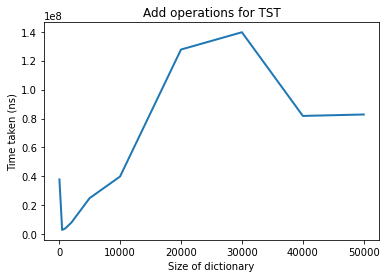

In [39]:
inputs = [50, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]
plt.plot(inputs, output_tst_time_add_ns, linewidth=2, markersize=12)
plt.title("Add operations for TST")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")

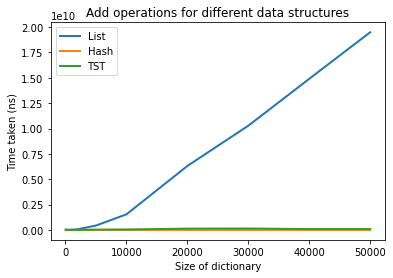

In [30]:
plt.plot(inputs, output_list_time_add_ns, linewidth=2, markersize=12, label='List')
plt.plot(inputs, output_hash_time_add_ns, linewidth=2, markersize=12, label='Hash')
plt.plot(inputs, output_tst_time_add_ns, linewidth=2, markersize=12, label='TST')
plt.title("Add operations for different data structures")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

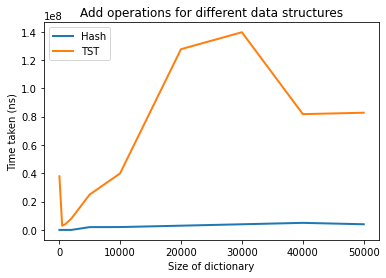

In [32]:
plt.plot(inputs, output_hash_time_add_ns, linewidth=2, markersize=12, label='Hash')
plt.plot(inputs, output_tst_time_add_ns, linewidth=2, markersize=12, label='TST')
plt.title("Add operations for different data structures")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

In [12]:
print(output_hash_time_add_ns)
print(output_list_time_add_ns)
print(output_tst_time_add_ns)

[0, 0, 0, 0, 1974000, 2014200, 2994500, 3986600, 4987000, 3995000]
[0, 6982500, 15954700, 63858400, 431843300, 1535891600, 6307121600, 10279502900, 14900139300, 19496838100]
[37895700, 2992100, 3989000, 7978900, 24933100, 39898400, 127658200, 139621600, 81782000, 82777800]


# scenario 2 

In [13]:
random.shuffle(words_frequencies_from_file_list) #shuffle datasets so words arent deleted in the order they were added
random.shuffle(words_frequencies_from_file_hash)
random.shuffle(words_frequencies_from_file_tst)

In [14]:
test_samples = [0, 10000, 20000, 30000, 40000, 45000, 48000, 49000, 49500, 49950, 50000]

output_list_time_delete_ns = []

for i in range(10):
    init_time = time.time_ns()
    for wf in words_frequencies_from_file_list[test_samples[i]:test_samples[i+1]]:
        agent1.delete_word(wf.word)                                            
    output_list_time_delete_ns.append(time.time_ns() - init_time)
output_list_time_delete_ns

[12162.4885,
 9886.5527,
 7422.1412,
 4914.8508,
 1235.699,
 344.0744,
 50.8643,
 11.9679,
 2.9918,
 0.9974]

In [15]:
test_samples = [0, 10000, 20000, 30000, 40000, 45000, 48000, 49000, 49500, 49950, 50000]

output_hash_time_delete_ns = []

for i in range(10):
    init_time = time.time_ns()
    for wf in words_frequencies_from_file_hash[test_samples[i]:test_samples[i+1]]:
        agent2.delete_word(wf.word)                                            
    output_hash_time_delete_ns.append(time.time_ns() - init_time)
    
output_hash_time_delete_ns

[7.9768, 7.9795, 6.013, 4.9879, 2.9886, 0.9971, 0.9973, 0.0, 0.0, 0.0]

In [16]:
test_samples = [0, 10000, 20000, 30000, 40000, 45000, 48000, 49000, 49500, 49950, 50000]

output_tst_time_delete_ns = []

for i in range(10):
    init_time = time.time_ns()
    for wf in words_frequencies_from_file_tst[test_samples[i]:test_samples[i+1]]:
        agent3.delete_word(wf.word)                                            
    output_tst_time_delete_ns.append(time.time_ns() - init_time)
    
output_tst_time_delete_ns

[71.8128,
 68.8189,
 68.8097,
 65.8238,
 32.9128,
 19.9459,
 5.9889,
 3.9853,
 1.9938,
 0.9983]

Text(0, 0.5, 'Time taken (ns)')

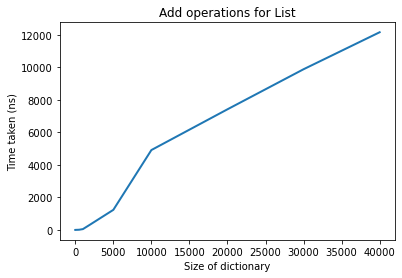

In [43]:
inputs = [40000, 30000, 20000, 10000, 5000, 2000, 1000, 500, 50, 0]
plt.plot(inputs, output_list_time_delete_ns, linewidth=2, markersize=12)
plt.title("Delete operations for List")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")

Text(0, 0.5, 'Time taken (ns)')

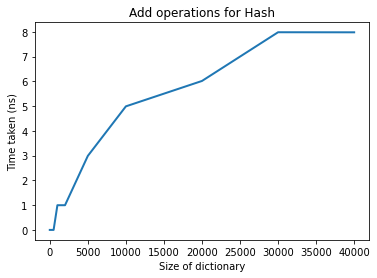

In [44]:
inputs = [40000, 30000, 20000, 10000, 5000, 2000, 1000, 500, 50, 0]
plt.plot(inputs, output_hash_time_delete_ns, linewidth=2, markersize=12)
plt.title("Delete operations for Hash")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")

Text(0, 0.5, 'Time taken (ns)')

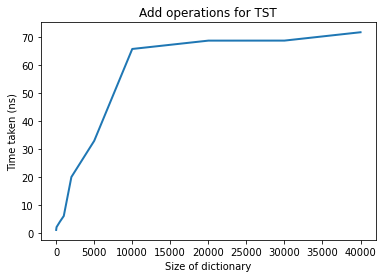

In [45]:
inputs = [40000, 30000, 20000, 10000, 5000, 2000, 1000, 500, 50, 0]
plt.plot(inputs, output_tst_time_delete_ns, linewidth=2, markersize=12)
plt.title("Delete operations for TST")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")

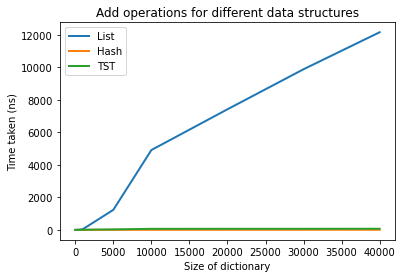

In [46]:
plt.plot(inputs, output_list_time_delete_ns, linewidth=2, markersize=12, label='List')
plt.plot(inputs, output_hash_time_delete_ns, linewidth=2, markersize=12, label='Hash')
plt.plot(inputs, output_tst_time_delete_ns, linewidth=2, markersize=12, label='TST')
plt.title("Delete operations for different data structures")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

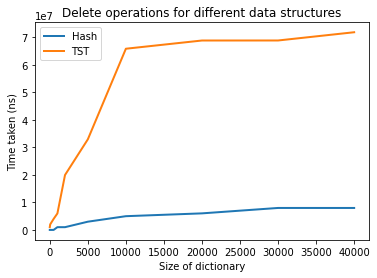

In [58]:
plt.plot(inputs, output_hash_time_delete_ns, linewidth=2, markersize=12, label='Hash')
plt.plot(inputs, output_tst_time_delete_ns, linewidth=2, markersize=12, label='TST')
plt.title("Delete operations for different data structures")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

In [59]:
print(output_list_time_delete_ns, output_hash_time_delete_ns, output_tst_time_delete_ns)

[12162488500, 9886552700, 7422141200, 4914850800, 1235699000, 344074400, 50864300, 11967900, 2991800, 997400] [7976800, 7979500, 6013000, 4987900, 2988600, 997100, 997300, 0, 0, 0] [71812800, 68818900, 68809700, 65823800, 32912800, 19945900, 5988900, 3985300, 1993800, 998300]


# scenario 3

In [68]:
words_frequencies_from_file_autosearch_50k = words_frequencies_from_file[150000:]
agent1 = ListDictionary()
agent2 = HashTableDictionary()
agent3 = TernarySearchTreeDictionary()

agent1.build_dictionary(words_frequencies_from_file_autosearch_50k)
agent2.build_dictionary(words_frequencies_from_file_autosearch_50k)
agent3.build_dictionary(words_frequencies_from_file_autosearch_50k)

words_to_search_50k = random.sample(words_frequencies_from_file_autosearch_50k, 100)
prefixes_to_search_50k = []
for i in words_to_search_50k:
    prefixes_to_search_50k.append(i.word[:2])

list_search_execution_time = []
list_auto_execution_time = []

hash_search_execution_time = []
hash_auto_execution_time = []

tst_search_execution_time = []
tst_auto_execution_time = []

In [64]:
def auto_search(agent, words_search, prefix_words, search_list, auto_list):
    init_time = time.time_ns()
    for i in words_search:
        agent.search(i.word)
    search_list.append(time.time_ns() - init_time)
    
    init_time = time.time_ns()
    for i in prefix_words:
        agent.autocomplete(i)
    auto_list.append(time.time_ns()-init_time)

In [69]:
auto_search(agent1, words_frequencies_from_file_autosearch_50k, prefixes_to_search_50k, list_search_execution_time, list_auto_execution_time)
auto_search(agent2, words_frequencies_from_file_autosearch_50k, prefixes_to_search_50k, hash_search_execution_time, hash_auto_execution_time)
auto_search(agent3, words_frequencies_from_file_autosearch_50k, prefixes_to_search_50k, tst_search_execution_time, tst_auto_execution_time)


n
b
a
k
n
t
s
s
e
d
c
g
d
f
e
d
s
n
s
e
o
f
e
t
t
s
e
a
c
b
u
s
d
i
n
g
b
h
i
p
s
l
i
t
i
e
s
i
n
u
p
e
r
l
l
s
e
a
t
r
i
z
a
t
i
o
n
o
r
o
n
a
m
e
a
m
e
f
g
l
i
a
n
i
i
y
i
n
g
c
a
r
t
i
o
n
s
r
l
n
l
e
d
r
s
i
m
s
i
a
n
s
e
i
z
s
t
y
t
m
e
d
i
s
c
e
d
s
t
i
n
g
l
h
i
k
j
a
u
t
i
n
e
t
i
e
s
s
s
h
e
t
u
r
i
z
i
n
g
a
n
i
t
e
m
s
o
i
n
a
s
e
r
o
l
y
r
g
a
n
i
a
n
m
m
a
d
w
p
a
t
r
a
k
s
t
y
r
m
e
m
i
j
i
a
n
j
i
s
u
s
e
n
s
e
s
i
e
e
n
n
t
o
u
m
u
s
d
a
s
r
s
t
l
e
i
n
k
a
r
o
s
h
c
u
l
a
i
r
e
i
l
l
x
w
k
t
a
i
e
n
g
t
i
o
n
i
n
e
s
o
r
t
h
s
o
p
n
k
a
i
y
y
o
i
e
t
g
s
o
n
u
s
k
s
y
d
o
l
l
y
y
b
n
e
a
u
x
d
e
a
t
e
n
u
m
o
i
n
g
n
e
i
n
g
p
g
e
a
d
o
r
l
n
i
j
k
o
h
u
l
l
l
o
n
y
e
d
w
u
l
s
a
i
h
e
u
s
t
h
k
i
e
d
u
m
e
n
t
a
r
y
n
g
i
e
a
z
u
k
i
e
z
u
m
a
i
b
i
e
d
n
g
y
r
i
d
g
e
l
e
l
s
t
e
v
l
i
e
a
d
b
u
r
n
p
h
o
m
e
s
r
o
i
t
t
i
o
n
u
c
k
s
z
e
a
t
i
o
n
i
n
g
d
s
i
a
t
i
o
n
n
g
r
o
p
p
a
i
n
g
c
i
n
g
r
n
d
g
e
r
s
i
k
l
o
o
l
a
b
a
e
l
e
l
e
e
b
e
a
m
s
l
g
l
o
w
o
i
t


o
r
e
t
t
o
a
r
c
k
c
a
i
e
d
e
s
h
i
p
a
u
e
l
i
l
e
r
e
i
e
r
n
g
o
r
t
s
c
i
a
r
u
e
r
o
l
l
e
r
b
l
e
e
a
d
o
r
e
s
i
o
m
i
s
o
s
i
n
g
s
n
d
r
e
s
i
e
d
f
i
l
e
n
a
m
e
s
b
i
l
i
t
y
n
s
r
t
a
m
i
e
n
t
o
u
n
d
s
t
i
t
e
d
s
e
d
e
n
t
e
s
a
i
e
x
t
m
j
o
e
n
t
i
e
d
s
n
g
o
i
n
g
s
i
n
o
n
s
g
c
a
n
c
y
m
e
n
t
a
r
y
a
i
t
y
t
i
e
s
d
o
n
s
c
i
n
i
e
d
t
n
g
e
n
t
t
l
n
s
a
b
l
e
l
e
d
e
a
i
t
o
n
o
v
e
r
n
s
c
y
t
l
a
d
d
s
e
a
t
a
t
r
v
e
c
o
m
s
i
o
v
e
n
e
a
t
d
o
r
a
s
i
o
n
i
n
g
r
i
h
q
n
s
w
t
r
a
i
n
i
n
g
i
o
c
h
e
a
m
e
z
e
d
t
c
r
d
n
i
e
s
r
e
s
s
s
e
d
s
a
i
e
r
f
i
l
e
s
t
m
e
n
t
s
a
l
i
z
a
t
i
o
n
s
t
i
v
e
i
o
n
b
r
t
o
i
v
e
s
r
l
i
l
i
t
y
e
y
t
i
f
i
c
a
t
i
o
n
s
i
b
l
e
r
e
s
s
e
a
d
e
y
v
e
r
s
e
n
n
i
e
c
a
t
i
o
n
s
e
a
u
n
d
e
r
s
n
d
e
i
u
o
s
n
d
o
i
t
f
i
c
a
t
i
o
n
y
i
e
s
r
e
e
p
l
a
c
e
r
s
t
s
w
e
b
n
t
a
i
n
g
t
o
i
v
e
r
i
e
a
u
t
a
i
r
e
c
t
y
a
e
s
r
i
a
n
f
g
u
i
d
e
a
m
i
l
y
a
b
n
t
e
o
i
o
n
s
r
d
t
s
l
e
t
s
n
h
e
r
a
t
e
i
s
i
a
r
i
y


s
p
n
r
l
a
y
s
i
n
t
p
e
l
l
i
n
g
s
o
w
e
e
k
t
e
r
i
e
r
g
d
a
n
y
a
t
y
n
s
o
t
r
o
l
l
n
g
o
m
l
i
a
e
g
r
a
s
t
i
m
m
f
i
h
a
n
d
l
e
g
c
t
e
s
t
d
r
o
n
t
u
s
n
p
l
a
n
e
t
a
e
m
e
t
y
p
e
e
p
t
o
r
e
e
c
t
s
z
t
i
l
s
a
k
e
r
m
e
n
t
p
b
n
g
s
u
s
t
e
r
e
d
u
s
a
i
p
i
n
o
c
c
h
i
i
a
e
c
o
l
o
r
r
t
i
n
g
s
b
l
e
p
n
i
n
o
s
o
m
e
n
a
t
h
r
a
r
i
n
e
s
s
f
m
i
k
c
i
y
o
w
o
r
k
s
g
r
a
p
h
y
a
k
i
e
r
n
g
e
o
r
c
e
s
t
e
a
x
s
i
s
s
m
s
a
i
e
s
t
p
r
o
f
i
l
e
s
n
c
u
t
e
s
g
m
e
n
t
i
t
e
t
f
c
h
a
r
g
p
l
y
u
s
r
a
n
d
e
a
r
c
h
s
n
i
o
n
c
o
m
a
c
o
m
a
g
e
o
a
t
e
v
r
u
i
t
s
g
f
b
a
n
t
a
i
o
y
r
d
u
l
l
s
g
h
o
i
l
y
g
h
t
s
e
i
n
g
r
x
l
h
a
o
u
s
e
w
k
p
n
z
a
s
w
i
a
l
l
e
d
s
e
t
i
g
d
e
n
a
o
r
p
e
m
r
t
e
r
i
r
o
o
f
i
n
g
t
s
i
n
e
u
a
r
d
x
t
v
e
b
s
o
m
e
f
u
l
n
e
s
s
p
h
o
t
o
s
e
n
t
s
t
s
z
w
c
r
h
u
g
h
o
v
i
a
a
r
r
a
l
d
o
i
a
t
e
r
l
l
i
a
m
s
u
t
z
i
z
l
e
k
o
l
a
u
t
i
a
e
d
h
f
t
i
v
e
s
n
u
m
n
t
y
c
u
m
b
r
e
s
l
i
v
e
x
p
h
c
a
o
h
m
a
n
l
l
e
y
t


h
z
a
c
b
r
o
r
n
o
t
h
e
r
y
h
e
s
t
l
i
n
g
s
m
w
a
i
n
d
s
y
o
a
n
n
t
i
e
y
s
s
e
g
h
t
o
a
v
e
n
p
e
t
a
l
e
l
h
i
l
d
o
u
g
h
u
e
i
r
s
d
n
h
a
m
l
t
e
t
r
n
m
i
e
c
i
c
l
o
v
i
r
d
t
r
s
r
a
c
k
e
r
o
u
s
o
s
l
n
s
e
y
i
a
r
i
z
s
t
y
e
e
s
f
u
n
e
a
r
c
h
q
o
i
m
d
e
s
k
c
a
r
t
g
d
e
f
i
o
r
c
e
c
t
i
o
n
n
e
t
u
i
l
o
m
s
t
o
n
i
n
e
s
g
s
i
t
e
n
z
o
n
e
a
o
i
n
s
y
m
s
b
g
r
a
p
h
i
c
s
u
l
o
u
s
z
i
y
a
i
e
e
d
s
m
a
c
z
i
n
g
i
o
r
i
a
r
l
i
o
n
i
e
r
s
t
s
o
a
m
l
b
i
d
c
r
y
e
n
h
a
m
s
h
e
i
t
e
e
n
n
d
s
h
g
t
o
n
e
n
o
w
n
e
l
l
e
b
a
l
c
i
a
l
o
y
w
s
h
o
n
l
i
n
e
a
n
d
v
i
l
l
e
t
e
a
y
a
d
y
a
r
d
o
r
k
e
r
r
s
j
d
a
y
l
w
a
y
l
o
n
p
s
r
a
e
i
n
g
d
t
o
n
o
n
l
n
l
y
n
h
t
u
t
h
i
n
g
z
a
d
k
i
g
h
t
e
d
o
i
n
t
o
u
d
j
a
q
l
c
a
f
e
l
f
e
o
m
a
v
a
e
g
a
k
i
r
k
u
r
r
i
a
s
o
h
i
n
e
b
r
i
d
g
e
r
y
r
s
t
o
y
a
n
o
i
e
w
h
o
o
d
o
r
k
t
a
f
f
f
t
y
y
i
n
g
e
a
c
s
i
s
o
i
b
l
e
t
w
f
i
e
l
d
b
u
r
g
n
e
c
a
d
e
s
i
a
t
i
o
m
n
n
a
b
l
e
a
l
s
m
t
i
t
a
i
t
e
s


s
l
i
e
a
l
r
i
a
n
z
s
o
k
u
v
i
c
h
u
p
v
m
o
n
a
n
s
h
i
p
i
l
l
e
w
a
r
e
t
d
l
r
n
e
s
s
e
o
s
w
i
r
e
h
a
r
e
c
r
a
c
y
r
a
m
w
y
x
i
a
c
f
e
n
t
i
e
l
d
h
a
n
m
p
e
r
t
u
r
e
v
a
l
u
e
w
t
m
n
p
r
a
y
n
e
i
c
e
e
t
e
a
r
a
m
e
c
h
y
x
u
m
e
b
p
o
r
t
a
l
m
s
i
a
l
l
y
u
m
a
s
p
z
n
l
l
i
a
n
e
r
d
z
a
o
e
s
z
u
r
k
a
o
i
n
i
l
a
w
i
e
c
k
i
e
t
r
i
n
l
a
n
e
a
b
e
a
c
h
u
r
y
e
l
l
i
n
e
v
n
i
o
h
f
a
i
r
a
p
u
r
s
v
i
l
l
e
h
o
f
e
n
r
t
r
g
a
t
e
r
s
s
d
e
s
s
l
e
y
i
e
r
n
s
i
c
k
s
c
a
t
a
e
d
e
i
o
n
a
d
o
n
v
i
a
n
i
n
f
i
h
a
o
t
r
a
m
l
k
i
o
m
e
b
e
r
g
s
t
e
e
n
s
b
u
r
y
s
n
r
y
y
l
o
a
e
i
n
s
o
n
a
b
l
e
c
r
y
e
i
g
h
g
c
a
k
n
z
s
i
a
o
a
d
i
i
s
n
e
a
n
c
i
e
s
d
o
u
n
c
t
i
o
n
e
d
r
y
m
a
t
i
o
n
s
c
i
r
k
n
a
e
c
o
n
y
v
o
l
e
n
c
e
t
i
m
s
p
i
n
a
a
u
t
e
s
e
w
y
o
a
i
e
r
r
e
v
u
k
u
e
o
l
i
o
r
n
e
a
b
y
o
i
h
u
s
n
n
d
e
x
t
r
i
n
s
e
d
s
c
a
b
b
a
u
i
t
t
t
t
l
c
b
a
g
g
k
e
t
t
l
e
a
n
h
o
o
e
r
n
e
t
u
t
r
m
p
l
a
y
s
l
e
y
d
s
f
u
l
n
d
o
r
o
p
w
n
i
g


o
l
e
a
w
s
a
r
e
k
h
a
e
d
u
l
a
t
i
o
n
e
r
o
t
i
v
o
n
a
l
i
z
e
d
e
m
d
a
b
i
l
d
e
r
u
t
o
a
t
e
s
p
v
o
t
z
e
n
a
r
t
y
a
u
s
u
g
h
i
l
e
a
v
e
s
t
e
b
i
n
g
a
c
k
i
n
s
r
e
r
e
a
s
s
i
e
a
t
i
v
e
n
h
e
a
d
s
n
e
g
s
s
r
l
k
j
i
a
n
e
n
p
o
r
i
e
d
l
a
n
d
n
l
l
i
z
t
i
n
i
a
k
a
p
l
e
f
a
d
c
e
h
n
e
s
r
p
c
g
n
e
s
s
o
l
d
a
m
i
x
y
e
a
d
e
r
t
s
e
h
b
a
t
a
g
e
x
o
v
e
r
n
m
e
n
t
u
g
s
n
i
l
m
i
d
m
a
r
k
e
t
e
y
n
g
s
e
t
w
o
r
k
i
n
g
e
r
e
l
i
d
n
z
c
i
e
r
s
e
a
l
n
a
e
r
a
l
l
y
g
s
i
e
a
m
e
n
t
o
r
u
n
g
p
i
s
z
a
e
s
t
i
o
n
a
t
i
o
n
r
e
f
e
r
e
n
c
e
s
n
g
k
i
s
n
a
l
s
g
t
e
n
l
y
e
s
s
h
t
e
r
r
e
e
r
d
s
l
i
e
y
n
e
e
b
e
i
n
e
r
l
n
b
e
r
g
s
t
e
i
n
e
a
l
z
l
a
s
r
s
p
n
r
l
a
y
s
i
n
t
p
e
l
l
i
n
g
s
o
w
e
e
k
t
e
r
i
e
r
g
d
a
n
y
a
t
y
n
s
o
t
r
o
l
l
n
g
o
m
l
i
a
e
g
r
a
s
t
i
m
m
f
i
h
a
n
d
l
e
g
c
t
e
s
t
d
r
o
n
t
u
s
n
p
l
a
n
e
t
a
e
m
e
t
y
p
e
e
p
t
o
r
e
e
c
t
s
z
t
i
l
s
a
k
e
r
m
e
n
t
p
b
n
g
s
u
s
t
e
r
e
d
u
s
a
i
p
i
n
o
c
c
h
i
i
a
e
c
o


r
i
c
u
s
e
i
m
t
o
l
t
e
n
e
r
s
t
i
c
e
s
m
g
i
a
l
s
g
a
n
u
w
v
e
a
l
l
a
s
r
z
h
e
n
i
t
s
y
n
a
y
s
c
b
i
l
e
l
i
z
t
y
e
d
i
o
n
e
s
z
t
i
e
s
o
n
i
o
n
i
e
k
p
d
c
i
t
o
u
d
u
s
n
l
o
q
u
y
a
s
i
a
r
g
o
i
t
y
o
t
f
i
e
d
y
t
a
s
i
s
t
m
i
c
s
m
n
p
l
a
t
e
o
t
i
d
n
i
z
a
t
i
o
n
y
x
p
o
n
p
o
o
s
t
h
y
e
d
s
e
r
s
t
s
q
h
e
i
r
o
n
i
a
a
s
e
t
i
r
y
c
a
t
e
d
i
g
d
a
l
i
e
p
s
t
a
a
t
h
a
e
r
f
o
r
s
c
h
u
n
g
s
b
e
r
e
i
c
h
g
e
r
i
o
e
i
i
m
w
l
f
k
r
a
n
a
c
t
s
n
s
t
e
k
s
t
e
n
e
a
r
c
h
a
m
e
i
s
t
r
i
t
e
r
s
o
f
t
n
y
u
o
s
r
i
s
a
h
t
i
n
p
e
r
g
r
a
m
s
s
o
e
u
s
c
a
o
m
i
e
l
y
n
g
c
w
a
r
e
a
l
l
e
o
i
m
m
u
s
k
o
k
u
r
b
g
l
u
n
d
r
e
n
e
r
g
u
t
s
s
n
o
w
s
k
i
t
e
n
u
t
o
a
m
o
n
h
d
f
w
a
r
e
t
e
r
o
e
r
b
y
n
y
w
v
a
e
i
e
t
r
e
i
g
n
g
e
e
d
a
e
n
n
k
l
o
a
d
s
r
t
o
b
y
z
e
a
b
e
a
n
l
e
n
t
r
r
n
l
c
i
e
m
i
s
e
a
d
r
d
f
j
i
e
r
a
l
o
r
c
e
y
s
p
e
s
d
w
c
b
y
t
e
s
f
n
i
n
g
s
t
p
s
t
y
s
t
e
m
o
i
c
k
s
r
m
r
o
o
f
e
i
n
g
d
r
e
c
h
a
c
k
n
e
t
e
s
s
o


e
u
i
t
e
r
o
s
a
a
o
d
m
i
n
i
n
s
i
a
l
c
w
o
m
a
n
a
l
e
r
a
l
l
o
y
r
a
l
l
n
l
i
c
a
e
m
y
a
e
n
n
i
l
e
o
o
i
g
h
t
s
r
d
g
r
g
a
e
r
i
n
g
o
r
y
o
r
i
y
s
t
o
r
e
s
c
a
l
s
e
z
a
i
n
g
d
o
s
e
a
t
i
o
n
a
l
h
e
a
b
c
a
i
r
a
s
g
d
e
y
i
m
t
i
a
n
c
e
r
a
n
d
e
d
b
o
a
c
k
o
k
s
i
w
s
m
l
o
a
d
s
r
o
i
x
t
r
o
n
i
c
e
n
s
i
t
i
v
e
y
v
s
i
l
l
e
o
r
k
e
r
s
r
n
a
t
e
o
s
t
i
s
k
q
p
n
e
r
a
s
e
u
e
e
y
t
s
i
a
e
h
e
r
n
t
l
l
t
e
s
t
n
o
i
t
o
n
o
v
i
l
l
e
n
n
e
l
a
u
o
p
e
i
a
s
n
m
l
l
a
i
r
o
t
n
o
n
e
i
o
o
n
l
i
n
e
u
a
r
i
n
a
a
i
e
s
l
l
o
a
i
n
e
t
a
s
n
s
r
l
e
f
b
a
r
w
m
v
a
n
i
a
a
n
o
o
d
o
r
d
a
o
e
s
l
t
i
e
o
n
g
l
l
e
o
l
a
t
e
i
o
n
i
w
n
o
a
y
i
f
e
w
l
l
o
w
s
l
m
t
o
u
t
o
n
e
r
e
e
s
s
e
n
g
r
i
s
n
g
v
y
w
x
z
c
m
e
s
u
g
a
u
s
e
a
e
u
i
o
r
t
i
n
g
l
t
o
n
a
e
t
i
o
n
l
n
r
s
t
t
n
d
e
r
c
l
l
i
e
r
i
a
n
i
o
o
g
c
d
a
a
u
h
y
s
e
s
s
i
u
s
a
n
s
l
t
s
t
a
l
i
t
y
i
c
i
o
n
u
s
i
s
n
g
o
k
s
b
a
c
t
e
r
h
t
g
d
b
a
t
b
q
d
c
t
o
a
c
i
o
l
o
s
l
e
r
e
m
e


a
i
n
d
r
d
l
y
o
i
m
e
w
n
r
i
o
a
m
i
s
e
c
o
m
r
i
c
o
m
o
u
s
g
s
i
n
g
s
h
t
s
c
o
m
a
o
i
e
c
d
u
r
s
m
a
n
c
e
d
a
e
s
e
n
s
d
o
r
p
m
f
k
i
g
e
n
z
s
g
a
u
l
a
n
d
k
e
e
b
o
s
h
e
y
r
n
t
o
n
z
s
d
e
i
n
g
n
e
e
s
d
c
k
i
n
o
c
k
s
h
i
r
e
n
r
i
d
g
e
i
a
s
r
e
t
o
n
t
w
v
i
e
a
r
d
t
o
o
r
t
t
y
z
h
n
e
v
t
s
e
r
t
o
n
o
n
h
f
o
r
d
t
o
n
o
n
r
e
r
t
o
n
e
n
s
n
l
e
o
w
r
a
h
a
n
e
l
e
r
a
e
t
f
o
r
d
m
a
n
u
t
k
d
c
h
e
d
m
f
b
c
r
u
m
b
o
x
r
u
i
t
a
k
e
r
l
e
y
a
t
p
f
b
e
a
t
a
s
t
e
d
o
i
n
t
w
y
a
t
e
r
s
h
r
o
u
g
h
g
w
a
y
s
e
u
l
t
h
i
a
e
r
d
s
s
b
l
y
z
e
r
l
e
t
s
a
k
i
n
g
l
y
t
t
m
l
n
s
t
n
d
c
a
n
r
c
p
d
a
t
c
h
l
i
f
f
e
n
t
e
k
s
s
e
b
a
t
s
l
i
n
l
r
l
w
o
r
k
h
e
l
f
g
e
r
f
e
c
a
s
e
l
f
i
e
l
d
s
e
y
m
l
l
i
o
a
o
n
n
c
e
s
h
l
m
i
e
r
n
g
e
y
a
l
l
t
o
n
e
a
g
h
t
e
n
l
i
n
g
s
e
a
s
w
e
l
l
t
a
r
e
s
s
n
e
i
n
g
r
d
n
d
a
i
e
r
d
s
g
e
s
g
r
o
o
m
h
m
a
i
d
s
e
a
d
l
e
s
e
t
o
n
d
m
v
t
i
e
l
l
e
w
a
n
s
o
q
u
e
n
l
e
t
t
e
y
e
s
b
t
k
o
n
l
y
o
e
r
l


i
l
l
e
i
c
h
p
p
b
l
a
d
e
u
r
g
v
t
r
e
e
t
i
l
l
e
a
c
e
u
c
k
g
h
u
r
l
a
t
t
i
e
r
r
g
h
i
e
d
r
s
k
n
g
h
n
j
g
g
s
g
h
i
o
a
n
s
k
p
n
v
d
a
d
e
i
e
r
a
d
i
n
e
s
i
l
l
e
y
t
s
h
s
o
n
e
y
a
m
x
a
c
h
e
n
s
i
b
o
y
s
h
o
t
s
o
n
e
n
l
a
w
d
n
f
s
w
a
l
d
e
r
e
r
u
r
p
t
s
t
r
l
e
t
i
n
g
s
l
z
y
w
p
p
h
o
n
t
n
b
d
e
f
f
l
y
n
w
a
l
d
g
z
i
e
l
a
n
e
k
e
e
p
a
e
p
e
n
f
i
c
k
l
t
e
d
i
g
w
a
l
d
i
n
g
y
t
e
r
t
e
r
o
e
b
c
e
r
y
l
e
r
n
m
h
g
f
a
g
y
n
l
i
t
e
i
n
g
e
n
r
n
p
i
e
n
g
v
s
p
p
s
e
x
u
t
h
e
s
k
t
y
o
e
n
d
i
e
c
k
p
l
c
h
o
n
d
n
b
i
l
e
s
s
n
g
r
e
a
k
i
n
g
s
w
o
r
k
e
l
u
t
s
x
t
i
s
o
i
d
d
s
b
e
a
k
s
v
z
e
n
o
r
e
l
i
n
g
m
a
n
n
y
t
s
n
t
o
w
l
e
i
n
g
r
s
t
h
s
e
s
l
i
l
i
n
g
n
g
p
m
s
b
e
r
i
d
g
e
v
t
h
u
a
n
d
e
l
i
s
e
d
r
z
v
n
a
m
d
b
c
e
c
h
u
s
i
o
u
s
e
b
a
r
e
d
o
w
n
i
e
f
g
h
a
m
e
g
l
i
f
s
c
h
e
x
e
x
b
a
g
l
e
c
o
e
r
n
g
y
i
n
g
o
e
a
t
i
o
n
s
i
e
u
s
n
t
n
s
w
u
a
t
l
e
e
l
l
s
s
m
a
e
y
i
n
g
s
r
r
s
i
a
n
s
f
t
p
s
o
p
s
r
o
o
o
t
s
p


r
o
n
m
a
e
o
s
b
y
n
d
e
r
o
d
t
i
o
n
a
s
e
r
y
t
e
i
n
r
m
e
n
t
e
a
l
s
d
t
a
e
e
p
q
u
e
s
t
a
i
h
e
u
s
n
g
t
o
n
g
f
a
c
i
a
l
e
n
y
i
c
i
e
f
o
r
s
o
c
k
c
n
g
t
o
n
o
i
y
s
m
n
a
r
t
a
t
i
b
c
g
o
n
k
w
a
g
l
l
y
n
z
w
v
y
e
l
l
i
a
n
o
h
o
t
g
s
p
l
m
o
l
e
c
u
l
a
r
o
g
y
e
h
t
e
r
a
o
s
p
h
a
t
e
d
i
c
s
t
s
s
t
a
t
i
c
r
a
p
h
i
c
i
c
s
y
g
i
a
v
n
v
i
l
l
e
o
x
a
o
e
d
c
e
t
i
n
g
i
l
n
e
t
t
m
d
b
b
i
n
e
l
f
g
j
s
a
l
v
a
g
f
o
n
i
e
i
t
h
s
l
s
e
r
r
v
s
b
a
c
h
i
a
e
n
t
o
r
n
g
l
p
w
a
l
l
o
r
t
l
e
t
s
e
a
b
y
n
p
o
t
p
i
e
h
y
n
n
g
e
d
d
t
n
s
i
n
g
r
o
d
a
w
o
o
d
c
u
d
e
z
z
l
a
r
d
i
e
s
t
i
y
n
g
i
c
a
b
e
s
t
n
s
e
d
t
f
e
r
s
t
j
o
u
r
n
a
l
s
l
y
e
x
u
l
e
g
h
a
n
e
r
t
n
k
h
g
f
i
n
g
i
n
g
i
n
g
l
e
y
s
r
i
n
g
b
o
m
h
g
e
v
r
i
l
l
e
r
a
s
s
i
l
i
a
w
k
e
g
h
t
s
e
s
a
m
l
g
h
v
e
n
n
e
s
s
a
r
k
e
t
s
u
w
v
i
l
l
e
i
c
h
p
p
b
l
a
d
e
u
r
g
v
t
r
e
e
t
i
l
l
e
a
c
e
u
c
k
g
h
u
r
l
a
t
t
i
e
r
r
g
h
i
e
d
r
s
k
n
g
h
n
j
g
g
s
g
h
i
o
a
n
s
k
p
n
v
d
a


x
t
m
j
o
e
n
t
i
e
d
s
n
g
o
i
n
g
s
i
n
o
n
s
g
c
a
n
c
y
m
e
n
t
a
r
y
a
i
t
y
t
i
e
s
d
o
n
s
c
i
n
i
e
d
t
n
g
e
n
t
t
l
n
s
a
b
l
e
l
e
d
e
a
i
t
o
n
o
v
e
r
n
s
c
y
t
l
a
d
d
s
e
a
t
a
t
r
v
e
c
o
m
s
i
o
v
e
n
e
a
t
d
o
r
a
s
i
o
n
i
n
g
r
i
h
q
n
s
w
t
r
a
i
n
i
n
g
i
o
c
h
e
a
m
e
z
e
d
t
c
r
d
n
i
e
s
r
e
s
s
s
e
d
s
a
i
e
r
f
i
l
e
s
t
m
e
n
t
s
a
l
i
z
a
t
i
o
n
s
t
i
v
e
i
o
n
b
r
t
o
i
v
e
s
r
l
i
l
i
t
y
e
y
t
i
f
i
c
a
t
i
o
n
s
i
b
l
e
r
e
s
s
e
a
d
e
y
v
e
r
s
e
n
n
i
e
c
a
t
i
o
n
s
e
a
u
n
d
e
r
s
n
d
e
i
u
o
s
n
d
o
i
t
f
i
c
a
t
i
o
n
y
i
e
s
r
e
e
p
l
a
c
e
r
s
t
s
w
e
b
n
t
a
i
n
g
t
o
i
v
e
r
i
e
a
u
t
a
i
r
e
c
t
y
a
e
s
r
i
a
n
f
g
u
i
d
e
a
m
i
l
y
a
b
n
t
e
o
i
o
n
s
r
d
t
s
l
e
t
s
n
h
e
r
a
t
e
i
s
i
a
r
i
y
e
s
e
o
n
e
a
b
l
e
o
n
s
m
t
e
m
e
n
t
s
d
r
s
e
n
t
n
r
c
i
a
l
i
z
e
d
t
s
c
i
e
r
n
g
u
r
a
t
e
e
a
i
r
y
r
e
s
p
l
u
g
i
n
c
a
t
e
g
o
r
y
d
u
r
p
o
l
k
t
s
n
e
b
o
o
k
s
m
i
e
n
a
m
e
a
n
d
r
s
i
k
v
t
o
w
n
i
l
l
e
o
w
n
t
p
n
m
b
e
s
o
l
o
h


y
s
t
e
m
o
i
c
k
s
r
m
r
o
o
f
e
i
n
g
d
r
e
c
h
a
c
k
n
e
t
e
s
s
o
n
t
s
r
l
i
p
s
a
f
t
o
a
v
e
s
r
k
s
s
t
v
e
n
i
r
s
h
b
a
m
p
t
o
n
w
c
l
f
e
d
a
l
e
y
r
a
s
t
w
a
r
d
n
e
r
h
a
m
p
t
o
n
i
e
l
d
a
n
d
o
a
s
t
o
e
a
r
k
s
t
a
i
r
l
i
n
e
s
c
o
m
l
d
r
e
a
c
h
i
d
g
e
s
e
c
a
v
s
i
s
e
i
n
g
p
a
r
t
s
s
l
c
o
d
e
r
e
s
o
l
v
e
a
b
s
w
a
r
e
a
u
p
f
e
t
b
o
e
c
e
r
o
r
l
p
r
o
w
r
t
i
o
n
e
s
a
p
k
a
t
i
m
i
s
t
o
i
a
r
a
a
t
a
o
l
n
n
u
s
y
w
s
b
y
a
r
e
s
r
n
c
a
b
u
r
o
a
e
b
i
e
k
i
a
t
e
d
l
n
u
t
i
l
s
a
f
i
l
e
n
e
r
t
u
r
e
u
t
s
e
d
i
e
d
n
g
c
h
e
r
d
y
r
l
t
d
t
c
o
n
s
o
l
i
d
a
t
i
o
n
i
e
d
e
m
e
n
t
f
i
n
g
t
g
r
r
i
n
g
g
i
n
f
o
e
d
s
a
n
t
e
s
d
c
t
i
v
a
t
e
i
o
n
g
n
d
l
h
r
n
g
n
e
e
l
o
s
t
v
e
r
h
m
b
l
e
r
a
g
e
e
s
s
e
d
w
s
i
n
g
a
t
c
h
y
i
a
d
e
e
n
u
g
o
y
n
e
n
e
g
l
i
g
e
r
s
h
i
p
s
a
i
n
n
g
s
t
s
r
a
m
a
i
m
e
l
k
o
c
a
t
i
o
n
h
b
e
n
i
n
g
l
t
s
y
z
w
o
e
i
g
h
t
o
d
o
n
e
i
m
e
i
o
c
k
n
e
s
e
a
d
l
f
d
e
p
d
j
l
e
y
a
y
s
t
r
s
i
d
e
w
h
n
o


t
s
c
h
o
i
e
l
d
r
d
r
i
y
s
n
a
g
k
e
c
a
y
e
v
o
m
h
i
c
a
n
g
s
e
r
a
s
l
l
y
f
e
r
d
s
s
r
m
o
e
n
t
c
o
r
d
m
l
b
a
n
d
i
a
e
s
s
y
e
r
w
o
r
l
d
n
e
s
k
i
p
s
r
p
n
j
o
t
e
s
i
s
e
a
k
u
n
n
i
n
g
w
e
b
t
e
n
s
l
o
t
h
o
e
u
t
i
e
l
r
n
n
a
n
a
n
e
a
m
l
i
n
e
t
m
o
n
a
n
i
e
r
n
e
n
t
e
r
r
e
t
h
w
a
i
t
e
e
i
n
g
t
w
b
a
l
l
s
n
c
a
a
e
a
v
e
t
c
b
a
n
k
c
g
a
u
d
a
a
t
t
a
r
i
a
g
a
y
s
e
a
r
o
i
o
u
r
s
v
i
l
l
e
t
e
c
a
n
c
o
m
u
r
a
t
e
s
r
c
a
u
u
e
i
n
g
s
i
n
g
n
d
m
g
e
s
b
f
n
r
a
k
e
d
e
o
o
t
e
d
e
t
o
a
c
k
i
n
g
n
e
t
l
k
i
h
a
m
s
t
o
n
e
h
s
i
a
e
d
d
a
n
g
s
i
d
e
d
a
l
e
e
y
a
n
a
y
r
h
m
a
n
n
o
u
t
i
a
p
h
i
n
i
n
g
a
e
s
n
n
i
e
n
s
o
n
e
c
c
h
i
a
l
e
y
n
r
o
m
c
l
i
n
i
c
s
r
n
a
s
y
e
f
l
e
x
e
t
e
r
s
s
i
k
i
a
e
l
t
t
e
i
s
n
g
n
c
u
d
a
m
v
c
t
t
c
a
o
y
s
o
n
s
m
n
e
r
n
t
o
s
s
s
o
s
o
g
e
a
d
o
o
r
b
c
u
l
l
e
s
a
y
s
w
h
s
t
o
r
m
i
n
g
a
m
o
o
d
s
t
t
e
a
n
d
n
o
b
l
e
h
e
a
r
m
p
o
l
l
e
l
p
u
n
d
i
t
o
n
a
u
o
d
e
s
d
s
e
s
t
e
r
y
u
w
e
l
l
c


e
d
e
m
s
o
o
r
l
k
j
i
g
h
k
i
f
a
r
a
u
l
t
o
n
m
e
n
t
a
l
i
r
u
s
r
i
e
n
t
i
n
r
a
o
i
d
a
d
e
g
t
i
a
a
t
e
d
s
v
i
a
d
y
d
b
e
r
g
t
u
f
l
s
m
o
g
r
a
p
h
i
e
d
i
g
e
r
t
l
e
r
z
e
d
u
u
o
n
o
w
s
k
i
n
g
o
i
a
i
n
g
u
c
h
i
e
t
i
o
n
l
n
i
c
a
h
q
m
n
p
o
u
n
s
l
t
h
a
k
r
a
b
t
i
o
r
s
s
o
n
m
i
l
e
l
i
t
y
s
p
i
k
i
s
a
o
r
a
d
r
d
i
e
x
i
e
n
m
b
e
r
t
r
i
o
n
a
l
i
s
u
a
g
i
n
t
m
c
e
m
b
r
e
a
e
m
i
a
u
s
d
c
a
t
e
o
b
i
a
o
e
r
g
e
g
s
c
h
e
n
c
e
a
l
a
l
e
s
e
s
h
i
n
e
t
t
o
l
i
t
y
r
m
o
s
t
a
t
z
a
t
i
o
n
a
i
h
e
c
h
i
l
s
r
a
d
a
l
n
m
e
n
t
a
l
a
e
l
l
o
t
r
a
i
v
e
s
a
o
e
i
t
s
i
z
s
e
d
e
d
r
i
d
n
b
r
e
n
n
e
r
u
o
u
s
r
o
t
i
o
n
a
l
o
e
a
r
s
k
u
e
o
s
n
i
a
c
b
l
a
n
c
e
o
p
l
i
n
e
s
n
a
s
e
h
o
r
e
o
p
r
a
l
i
n
a
t
m
c
a
u
h
m
o
o
t
o
m
a
t
i
c
l
f
g
r
o
u
p
s
i
n
a
l
i
s
t
s
l
a
s
i
o
n
t
i
n
u
o
u
s
r
c
u
l
a
r
s
n
o
t
i
c
a
y
a
k
r
i
s
a
n
s
w
i
m
p
l
e
e
e
t
o
n
t
h
l
y
r
i
e
s
c
a
i
l
e
r
r
s
k
a
i
o
n
e
s
m
e
o
m
s
t
o
i
e
d
o
g
r
a
t
i
s
o
n
i
d
t


In [70]:
words_frequencies_from_file_autosearch_20k = words_frequencies_from_file[180000:]
agent1 = ListDictionary()
agent2 = HashTableDictionary()
agent3 = TernarySearchTreeDictionary()

agent1.build_dictionary(words_frequencies_from_file_autosearch_20k)
agent2.build_dictionary(words_frequencies_from_file_autosearch_20k)
agent3.build_dictionary(words_frequencies_from_file_autosearch_20k)

words_to_search_20k = random.sample(words_frequencies_from_file_autosearch_20k, 100)
prefixes_to_search_20k = []
for i in words_to_search_20k:
    prefixes_to_search_20k.append(i.word[:2])

In [71]:
auto_search(agent1, words_frequencies_from_file_autosearch_20k, prefixes_to_search_20k, list_search_execution_time, list_auto_execution_time)
auto_search(agent2, words_frequencies_from_file_autosearch_20k, prefixes_to_search_20k, hash_search_execution_time, hash_auto_execution_time)
auto_search(agent3, words_frequencies_from_file_autosearch_20k, prefixes_to_search_20k, tst_search_execution_time, tst_auto_execution_time)


b
a
n
d
a
n
m
l
d
c
k
s
g
f
o
f
o
u
s
i
g
e
d
n
e
s
s
g
e
d
r
m
a
n
n
e
i
c
k
r
e
i
e
a
n
d
t
r
s
h
i
p
a
n
g
s
i
b
l
e
r
s
p
o
r
e
d
n
a
n
t
e
t
t
s
r
a
l
p
i
t
y
r
o
p
e
r
t
y
g
u
i
d
e
t
h
s
i
e
t
a
n
o
v
i
c
h
n
s
i
o
n
c
n
g
o
h
e
l
e
s
i
l
e
s
s
n
e
s
s
e
n
d
a
n
g
a
k
g
e
s
c
a
p
e
e
a
l
e
s
c
h
a
u
y
t
o
r
i
g
n
c
e
i
m
e
e
x
c
e
p
t
i
o
n
a
n
i
a
b
l
e
n
g
s
i
b
e
n
s
s
t
e
i
n
l
e
y
f
o
r
g
e
n
k
i
f
e
l
d
r
l
c
a
s
m
i
s
x
b
u
r
g
t
o
e
d
f
a
d
c
o
n
t
i
n
e
n
t
e
l
e
b
o
r
o
n
s
s
m
e
r
i
c
a
l
s
o
f
b
f
i
c
e
e
t
c
t
i
o
n
e
t
v
e
l
s
o
n
i
o
o
t
e
l
d
f
k
j
g
i
h
a
o
v
i
k
a
l
r
n
o
l
a
a
t
i
o
n
i
o
r
e
a
s
r
a
h
e
n
i
b
n
b
r
a
z
i
l
a
i
l
o
v
s
a
o
n
t
i
k
e
f
u
n
e
l
i
n
b
u
r
g
p
r
i
s
t
o
n
e
r
d
a
a
r
k
h
i
c
o
n
e
a
e
l
o
f
c
b
o
i
c
i
d
e
s
a
r
d
s
e
d
e
r
m
a
b
r
a
s
i
o
n
l
e
c
t
r
o
n
i
c
s
o
e
p
h
a
l
y
n
m
p
u
t
e
r
s
m
i
c
t
e
n
t
s
m
i
n
j
e
c
t
i
o
n
n
i
z
e
d
a
n
c
h
i
n
i
n
g
r
k
a
g
e
v
z
w
i
r
e
i
d
e
i
s
i
o
n
c
t
d
o
m
i
t
h
f
m
e
s
t
s
c
o
m
r
a
t


h
y
u
r
g
i
c
a
l
y
t
e
s
e
t
v
a
t
r
i
c
o
e
n
t
o
a
l
t
r
y
r
e
e
s
r
l
k
h
d
c
b
a
p
i
e
e
u
l
e
t
h
o
r
p
e
y
s
c
h
a
y
h
i
e
s
v
l
a
e
b
c
e
n
t
r
a
l
o
o
k
k
h
j
a
m
s
y
n
l
l
e
t
h
a
l
l
a
c
h
e
r
n
r
d
b
c
a
r
e
a
m
u
l
e
y
e
n
a
t
r
o
p
h
a
i
l
m
s
x
h
i
n
t
s
b
a
o
g
b
i
o
t
i
c
s
l
o
b
u
l
i
n
e
m
i
a
m
e
u
l
a
u
t
o
r
e
i
s
h
i
s
i
o
n
g
f
e
s
t
r
i
f
i
a
i
e
i
a
m
a
h
e
i
c
i
s
o
u
l
l
l
r
w
l
u
f
n
z
i
n
e
s
a
e
u
m
s
t
s
i
t
e
i
o
s
p
h
e
r
i
c
c
z
s
m
e
d
t
v
o
x
e
a
t
i
s
m
a
h
e
d
i
n
l
e
i
n
e
i
u
r
o
l
a
x
c
n
a
e
a
s
a
h
s
r
o
a
i
a
v
a
g
c
y
m
n
w
a
s
k
a
a
a
s
k
a
r
i
j
o
e
i
d
r
e
d
u
s
r
c
a
p
l
d
g
r
e
t
s
e
r
v
a
n
t
n
s
t
v
i
e
w
a
s
e
i
n
a
n
c
e
t
r
e
a
m
i
n
g
i
l
s
r
e
a
d
e
r
c
p
i
t
e
e
e
d
a
n
i
s
t
n
g
s
o
n
n
e
u
v
e
o
b
a
r
e
y
l
e
r
o
g
a
n
y
e
u
b
e
a
t
h
a
y
l
a
i
k
h
m
a
l
b
a
f
i
l
a
a
r
s
p
n
m
y
m
a
m
o
n
t
e
z
z
o
a
r
l
o
g
y
y
u
t
g
r
a
p
h
y
i
g
f
a
d
c
h
a
l
a
o
s
e
a
u
i
n
r
i
a
n
g
o
e
n
t
s
a
t
l
a
y
e
s
g
d
o
e
r
d
i
a
l
r
o
t
t
o
h


c
y
i
e
o
s
n
t
o
s
s
t
l
s
t
e
z
w
e
l
l
a
n
i
o
l
e
h
o
a
l
d
y
n
d
i
e
r
s
n
g
m
a
n
e
b
y
s
c
h
r
n
a
s
y
e
f
l
e
x
n
b
a
t
n
s
e
d
s
l
c
d
i
h
g
e
n
e
w
h
a
g
e
d
d
o
r
u
l
s
u
l
a
i
e
a
p
a
m
m
a
d
a
t
r
a
g
a
n
k
j
a
u
t
i
s
n
e
t
i
e
s
s
h
e
b
p
e
i
f
i
c
a
t
i
o
n
s
l
r
n
i
s
t
y
e
d
s
e
r
i
m
u
l
s
a
o
r
i
z
a
t
i
o
n
e
r
l
u
s
h
k
e
d
e
a
m
u
e
m
i
e
n
t
o
u
m
s
l
a
e
d
i
n
g
s
t
k
i
n
e
s
i
e
n
g
r
p
o
n
t
y
n
e
a
u
x
i
n
g
u
s
k
s
i
b
e
d
y
r
i
d
g
e
e
l
i
e
b
h
s
o
m
e
u
r
n
z
s
a
t
i
o
n
e
a
t
i
o
n
i
n
g
s
s
r
o
p
l
g
l
e
n
r
s
e
w
o
o
d
s
f
e
s
t
o
w
n
i
n
g
i
e
l
d
s
i
d
e
s
l
g
l
o
w
i
g
h
t
t
e
t
r
u
c
k
o
o
l
a
b
a
u
t
s
s
c
a
i
c
o
e
s
o
m
u
n
e
t
t
y
r
e
n
e
a
d
s
t
o
h
e
t
i
v
o
f
a
n
s
n
a
t
o
r
s
e
r
a
r
f
u
c
k
e
r
r
c
y
c
l
e
i
b
c
h
e
a
d
y
c
l
i
n
g
o
a
t
s
m
o
u
t
h
z
e
d
u
s
l
e
v
w
y
z
z
a
r
t
i
l
l
a
e
r
s
i
g
l
i
t
e
z
u
e
a
i
l
e
w
t
s
c
o
m
i
m
e
e
b
m
r
s
i
e
n
t
o
l
e
o
r
s
f
f
e
s
n
l
c
h
e
i
n
e
x
s
t
o
n
y
e
u
p
d
t
a
f
i
a
n
o
i
e
l
d
r
d
i
b


v
e
r
s
i
o
n
p
e
c
t
u
c
t
i
o
n
s
n
c
l
d
e
r
m
a
l
a
t
a
r
o
a
s
t
a
l
y
t
a
b
l
e
t
o
p
l
a
s
m
i
c
a
n
i
a
l
p
v
e
n
o
u
s
e
r
i
s
o
n
a
l
t
o
n
e
a
l
l
y
e
t
s
i
t
i
v
e
r
n
g
l
l
i
g
e
n
c
i
a
i
g
c
a
s
t
t
y
p
e
i
b
l
e
r
u
m
e
n
t
i
a
t
l
e
i
o
r
o
n
s
f
o
l
i
a
s
e
s
t
i
n
e
s
f
c
a
r
r
i
v
a
l
d
e
s
t
e
d
e
i
t
m
e
n
s
i
o
n
a
l
e
p
v
e
n
d
e
n
c
e
o
e
a
l
a
t
e
d
s
d
e
s
i
o
r
o
n
o
m
n
n
e
c
t
s
l
e
d
m
l
g
r
a
p
h
a
o
e
a
v
e
d
c
u
t
o
r
b
n
d
o
r
a
t
o
r
y
r
p
n
e
a
t
l
i
s
z
e
z
i
o
n
a
l
i
i
o
n
a
l
s
i
z
s
m
a
t
i
o
n
i
s
h
i
p
s
t
c
d
i
n
e
o
t
s
t
o
c
k
b
l
o
g
w
n
l
i
n
e
y
c
h
o
r
e
t
a
t
i
o
n
l
a
t
e
d
s
w
v
i
e
w
e
e
z
o
n
e
i
e
a
v
e
k
i
p
l
u
g
i
n
e
c
h
o
l
a
s
t
i
c
c
t
e
i
s
n
g
d
e
o
g
a
t
e
s
g
l
a
t
e
d
n
e
s
s
n
u
m
i
n
s
s
i
o
n
a
b
l
e
e
r
a
t
e
r
n
i
t
y
r
e
o
m
e
t
r
y
s
a
p
l
c
b
b
s
e
d
d
e
e
g
k
a
r
i
u
n
i
x
h
b
t
f
e
r
e
d
j
o
b
s
r
s
c
o
r
e
i
o
a
d
s
e
i
e
l
d
w
a
y
m
a
n
o
n
a
l
l
r
r
o
a
r
c
h
i
c
a
l
l
y
n
y
m
u
s
o
c
k
i
o
r
y
e
u
p
n
m


l
i
o
n
e
r
z
s
o
w
i
t
z
e
o
n
d
s
e
y
j
o
e
d
a
r
d
u
s
e
s
s
i
e
e
n
t
g
e
a
n
m
o
r
h
l
a
n
d
o
f
f
r
e
n
w
s
t
h
o
n
i
s
h
a
d
i
c
k
e
o
c
o
t
t
t
c
e
i
g
e
l
j
s
n
e
t
t
s
e
n
a
i
m
i
n
s
g
c
f
i
t
a
r
h
t
e
d
f
d
i
c
t
k
i
o
n
v
l
u
x
c
a
r
a
a
i
c
t
t
i
n
g
i
e
n
c
e
a
r
i
e
s
c
t
o
r
h
k
i
s
e
r
l
e
y
z
o
y
l
g
s
l
e
y
e
n
e
a
r
u
n
m
d
c
h
c
o
m
b
e
r
k
l
l
s
e
r
s
e
d
r
s
t
l
m
o
a
n
i
a
e
s
t
l
s
e
x
y
p
d
c
a
t
s
i
m
a
n
n
g
t
o
n
s
l
e
e
a
w
z
e
u
s
h
e
l
l
t
i
l
s
r
y
v
e
r
d
h
t
s
a
i
l
e
a
d
a
m
t
d
c
h
a
m
p
m
a
r
i
s
e
s
t
e
r
t
v
a
i
s
i
f
i
e
r
x
w
v
y
i
t
l
d
c
h
i
n
g
z
e
i
e
r
s
l
a
h
f
r
e
d
t
r
a
y
e
r
i
m
a
n
n
g
s
p
o
r
t
s
k
a
e
s
d
a
n
i
y
a
e
n
l
n
i
n
g
s
i
n
f
o
r
m
a
t
i
o
n
x
o
l
o
l
c
o
u
r
t
f
b
a
h
r
t
e
c
d
e
a
l
l
y
w
a
t
e
r
j
k
l
e
t
e
l
n
e
r
a
e
r
b
e
l
t
c
e
n
t
e
r
s
e
t
s
p
n
d
j
e
e
s
b
i
a
l
i
s
t
t
s
t
g
p
n
j
h
s
m
l
k
k
a
a
l
e
r
y
e
b
e
r
w
o
l
v
e
s
s
p
o
n
o
u
r
s
s
f
c
o
d
e
p
i
e
c
e
s
r
a
m
e
s
t
w
i
s
e
i
c
k
s
l
t
e
p
s
o
t
s


k
e
d
a
m
e
r
a
b
i
c
u
a
r
d
r
s
o
r
z
t
s
p
l
o
i
e
n
g
t
h
s
t
c
a
t
i
o
n
a
r
e
n
t
i
z
e
y
e
e
r
s
p
e
n
p
t
e
r
v
a
l
u
t
a
i
n
c
o
n
t
e
n
t
c
k
s
e
c
a
n
g
o
r
d
o
n
u
k
l
f
e
h
r
i
d
g
e
y
p
n
o
t
i
s
m
v
a
g
e
a
e
r
s
v
i
l
l
e
r
s
m
a
e
c
d
d
e
s
c
h
i
y
h
c
o
r
u
m
n
m
g
l
i
n
k
u
i
d
e
s
e
d
i
a
w
h
a
c
k
o
e
i
c
w
s
s
l
o
g
i
e
s
o
n
i
c
l
g
k
n
i
s
k
a
u
r
e
t
o
l
i
s
e
f
e
c
o
m
m
s
f
m
g
r
a
a
p
h
i
e
d
c
f
o
p
h
a
t
h
i
c
o
l
a
y
r
o
m
p
t
e
r
r
t
o
a
r
m
a
c
y
t
n
e
s
o
s
t
e
i
e
a
r
c
o
m
b
r
c
d
i
c
a
i
n
e
a
n
i
q
u
e
o
o
n
i
o
s
c
o
n
s
w
v
t
y
p
e
i
s
u
e
a
d
a
l
x
e
i
z
j
a
s
t
i
c
o
p
e
s
s
l
i
t
h
r
o
m
y
c
i
n
o
u
r
i
u
m
w
r
o
w
n
t
h
z
s
a
g
i
r
l
g
e
r
f
o
r
c
a
s
h
k
c
h
o
e
r
n
e
t
m
s
r
f
u
n
d
w
a
r
e
l
e
y
p
l
a
y
e
t
t
l
e
r
n
q
u
i
l
l
a
d
a
s
n
g
a
t
s
e
d
c
i
n
e
s
n
g
i
e
d
o
n
d
o
o
a
h
u
p
o
s
y
n
o
v
i
t
i
s
i
n
e
y
i
e
l
s
o
n
s
n
t
s
e
u
z
i
n
g
o
u
s
e
i
v
e
i
m
o
s
a
e
s
r
e
r
s
n
c
e
y
s
x
t
v
a
t
r
o
n
r
e
h
o
v
o
e
r
v
e
n
s
u
o
a
c
m


o
l
i
e
o
u
t
s
t
h
z
w
i
c
k
s
s
i
a
e
s
b
k
g
i
n
g
n
m
k
b
a
s
t
i
c
a
t
y
r
q
t
s
l
e
y
y
u
p
t
a
l
k
a
t
v
i
l
l
e
o
n
s
b
r
l
e
r
m
p
l
a
t
e
s
a
r
k
l
e
t
s
e
o
v
e
r
s
t
o
o
m
i
n
d
e
r
e
l
f
r
e
e
u
t
l
l
e
r
s
i
s
e
a
n
d
g
i
o
r
s
m
a
n
s
o
t
u
z
a
i
s
e
s
r
h
r
o
n
e
i
l
e
r
e
y
v
i
l
l
e
t
t
l
v
e
n
t
u
r
e
d
o
g
e
a
n
i
s
t
v
g
r
a
d
t
h
a
o
l
e
r
w
v
e
e
x
e
a
l
l
s
t
e
r
s
d
w
r
l
h
u
n
t
e
r
e
r
i
n
g
o
w
t
r
g
d
f
f
a
r
d
r
o
i
r
i
a
l
n
d
r
e
d
n
e
s
s
y
a
n
g
e
r
i
e
h
u
e
r
e
a
u
s
d
s
e
a
o
n
i
s
t
e
f
l
i
k
a
e
b
f
i
u
n
k
a
u
s
s
r
d
i
e
r
y
t
i
c
z
o
s
e
a
n
t
r
z
n
m
a
h
e
c
b
e
r
i
d
e
a
n
r
t
d
y
i
g
d
a
e
d
h
o
g
s
l
a
n
d
s
o
k
e
f
g
e
d
e
d
l
m
o
n
i
c
u
s
f
c
e
l
e
y
f
b
i
e
p
t
l
i
m
d
l
k
a
o
n
g
j
i
a
n
g
e
g
g
e
r
r
n
e
m
a
n
n
s
s
e
n
s
d
a
l
v
m
l
g
e
n
d
a
l
e
i
o
g
r
a
p
h
i
c
a
s
o
n
b
a
n
d
m
e
c
a
t
s
b
r
s
t
e
i
n
o
r
e
y
a
n
n
o
u
n
d
t
p
h
e
l
p
h
a
e
d
n
d
r
l
t
e
r
y
s
h
f
b
e
a
t
i
n
y
w
o
r
k
s
o
t
e
s
l
y
i
n
d
e
r
t
s
l
e
y
v
i
e
n
s


c
o
u
s
n
e
c
b
a
l
i
n
e
r
s
i
d
g
e
o
n
t
k
a
l
t
i
o
n
i
l
t
w
o
r
t
h
a
l
e
s
i
n
g
e
s
i
a
l
v
e
m
k
i
f
u
r
t
s
e
l
u
i
c
i
s
m
e
r
n
i
n
f
i
e
l
d
p
o
b
n
a
s
s
e
s
s
n
d
t
e
l
i
n
g
s
r
l
i
s
t
r
o
p
l
i
e
r
n
i
e
x
e
s
c
a
t
o
e
s
r
d
e
n
a
l
x
t
s
t
h
s
e
l
d
o
r
f
a
n
b
e
e
d
c
o
t
o
n
i
t
h
l
a
n
d
u
f
o
r
d
s
e
r
c
a
n
l
c
i
o
n
t
r
a
x
c
e
k
i
h
a
m
e
r
s
l
e
y
s
e
a
n
t
l
t
t
l
i
n
h
s
a
g
f
e
r
m
l
i
n
e
n
l
k
l
e
l
i
n
a
p
a
i
n
g
m
a
n
n
t
m
u
i
r
e
d
a
r
l
n
l
a
y
b
l
f
i
e
l
d
i
b
s
o
y
i
g
o
l
n
e
y
i
e
y
m
p
i
u
s
c
s
g
f
s
o
n
w
o
k
a
n
d
i
i
c
a
l
s
g
m
n
p
h
a
n
t
o
p
d
e
n
d
r
o
c
y
t
e
s
o
e
p
t
i
d
e
s
l
y
v
a
i
e
r
o
s
e
r
o
i
r
s
e
s
a
n
r
u
d
a
n
d
e
r
l
c
g
d
e
f
e
y
r
l
a
a
r
d
s
e
r
d
e
i
m
e
r
r
n
l
y
i
n
g
v
i
e
w
k
t
i
x
s
p
e
c
i
e
s
i
o
n
a
r
y
d
e
g
e
l
e
d
r
s
t
e
r
s
o
n
k
h
i
t
a
e
d
r
s
l
y
n
m
b
o
r
n
e
v
t
s
r
e
k
s
w
o
r
t
h
l
i
n
e
e
d
o
m
s
h
p
b
o
n
e
s
t
f
u
l
e
a
h
i
c
k
o
n
r
h
c
h
g
r
a
s
s
t
s
n
e
s
s
a
n
d
e
i
c
i
s
m
s
n
b
u
e
r


n
g
u
k
m
a
p
e
t
s
t
s
i
e
d
n
g
c
k
o
c
o
i
h
e
f
o
r
d
t
m
a
n
a
m
p
t
o
n
m
a
r
n
t
t
o
i
b
a
x
r
t
s
i
n
e
s
r
t
s
o
n
s
p
i
e
r
r
e
i
e
r
t
n
e
s
d
a
l
e
n
c
h
a
u
d
i
s
o
n
s
a
t
c
o
n
a
i
s
c
n
g
e
f
u
g
x
i
h
i
d
e
l
t
l
k
s
r
a
n
m
u
p
f
a
e
d
u
o
n
d
c
e
s
o
v
e
m
i
l
a
a
t
e
s
o
r
d
a
l
d
l
e
p
n
l
a
y
i
n
g
i
e
r
s
k
a
t
i
n
g
o
v
e
r
n
e
s
d
s
s
y
s
u
e
r
o
e
n
d
i
e
o
g
d
e
r
s
r
s
i
g
u
e
l
s
f
o
w
s
p
e
a
r
i
n
g
t
u
n
l
g
h
n
e
n
s
t
e
d
e
c
k
e
t
t
e
s
s
y
n
t
e
s
k
o
v
r
a
b
o
u
t
d
h
e
a
d
a
l
e
i
h
s
c
h
i
l
d
s
j
s
s
e
r
i
e
s
r
n
o
t
o
e
n
c
o
w
e
i
l
e
r
s
n
c
o
m
z
r
s
o
u
n
d
s
i
p
i
c
h
t
r
n
t
i
a
e
b
l
e
o
n
a
l
l
y
i
a
n
s
t
a
c
e
i
s
i
m
o
o
r
e
e
d
s
r
n
a
t
e
s
t
t
i
b
w
a
l
d
l
u
t
h
o
m
m
o
n
l
c
d
a
e
a
r
i
t
o
y
i
n
d
n
w
e
l
l
e
r
e
d
x
z
y
k
s
o
p
p
a
a
e
t
o
n
n
n
n
a
s
b
a
n
l
e
i
d
r
t
t
e
t
t
o
x
t
h
e
t
m
k
d
w
o
o
d
s
k
s
t
w
y
e
b
c
o
m
o
w
n
i
t
l
c
b
a
c
s
r
i
a
c
e
a
e
a
n
i
i
c
a
t
e
i
e
d
e
s
f
g
e
n
n
e
r
r
y
k
e
i
r
n
h
a
m
r
a
g
l


In [72]:
words_frequencies_from_file_autosearch_5k = words_frequencies_from_file[195000:]
agent1 = ListDictionary()
agent2 = HashTableDictionary()
agent3 = TernarySearchTreeDictionary()

agent1.build_dictionary(words_frequencies_from_file_autosearch_5k)
agent2.build_dictionary(words_frequencies_from_file_autosearch_5k)
agent3.build_dictionary(words_frequencies_from_file_autosearch_5k)

words_to_search_5k = random.sample(words_frequencies_from_file_autosearch_5k, 100)
prefixes_to_search_5k = []
for i in words_to_search_5k:
    prefixes_to_search_5k.append(i.word[:2])

In [73]:
auto_search(agent1, words_frequencies_from_file_autosearch_5k, prefixes_to_search_5k, list_search_execution_time, list_auto_execution_time)
auto_search(agent2, words_frequencies_from_file_autosearch_5k, prefixes_to_search_5k, hash_search_execution_time, hash_auto_execution_time)
auto_search(agent3, words_frequencies_from_file_autosearch_5k, prefixes_to_search_5k, tst_search_execution_time, tst_auto_execution_time)


s
f
d
c
a
o
w
m
o
r
d
i
n
a
t
i
o
n
i
e
x
d
i
m
e
n
s
i
o
n
m
a
p
r
a
g
c
a
v
i
d
u
e
l
n
i
t
y
g
i
h
a
i
b
i
t
i
n
g
l
a
t
i
o
n
s
n
j
u
r
y
q
u
i
r
e
s
s
b
u
n
d
e
t
t
z
i
o
a
l
e
a
l
a
e
l
t
o
n
e
s
a
n
u
i
u
m
i
t
y
t
i
e
a
n
t
i
n
o
r
r
i
n
g
o
r
f
m
e
r
c
i
a
l
s
r
e
e
s
m
a
t
i
o
i
n
s
t
e
c
h
n
o
l
o
g
i
e
d
n
i
t
e
l
y
e
l
i
t
i
e
s
t
v
e
o
l
v
e
s
s
r
g
t
o
r
d
o
n
t
i
g
a
c
t
i
o
n
s
i
o
n
e
s
e
c
o
r
a
v
e
n
o
u
s
l
e
r
a
n
c
e
r
l
g
r
a
l
e
l
i
t
y
p
e
p
l
f
d
i
m
e
n
s
i
o
n
a
l
e
r
n
e
a
t
i
o
n
a
l
i
s
m
s
h
i
p
s
c
d
t
o
n
l
i
n
e
i
n
e
o
e
a
n
d
a
v
e
d
c
u
t
o
r
s
c
h
o
l
a
s
t
i
c
r
e
t
a
t
i
o
n
t
e
a
r
i
h
o
r
e
d
e
s
r
t
a
b
l
e
t
u
r
p
p
o
r
t
a
b
l
e
a
e
i
n
g
n
c
e
n
c
e
s
a
i
e
a
d
r
u
m
e
n
t
a
l
i
s
t
s
t
u
t
e
l
d
e
b
i
t
l
a
z
i
o
n
e
s
a
o
n
p
i
n
g
s
i
d
e
s
o
r
t
f
t
c
a
n
b
l
o
g
s
l
e
t
e
o
p
t
o
r
i
b
e
s
n
i
c
h
e
r
e
d
r
a
m
i
r
o
l
g
e
t
m
a
r
r
e
s
s
m
n
a
m
i
c
i
e
a
c
s
b
a
g
t
a
r
u
o
e
a
d
o
s
t
i
n
g
t
t
a
n
t
e
r
e
n
z
o
w
y
n
t
e
s
p
l
a


b
l
e
q
u
a
i
n
t
e
d
o
h
a
n
n
i
l
y
l
a
s
s
i
f
i
e
d
a
r
t
e
d
n
m
p
l
i
c
a
t
e
d
f
o
r
m
i
t
y
f
e
d
x
r
s
c
a
p
e
r
i
n
g
c
i
t
i
n
g
t
r
p
l
i
m
f
i
e
r
r
n
s
t
a
l
l
a
t
i
o
n
v
e
r
s
i
t
a
i
e
s
i
r
e
s
e
f
a
g
i
n
a
b
l
y
n
a
e
a
s
h
e
d
o
l
u
g
g
e
d
p
u
l
i
s
t
s
p
e
a
s
o
n
a
b
l
e
u
i
p
p
o
r
t
a
b
l
e
t
e
d
e
a
k
a
b
l
y
e
o
u
n
d
e
d
l
s
e
r
v
e
d
a
t
e
d
a
r
u
t
h
p
p
e
d
u
l
i
n
c
h
i
n
g
l
y
r
l
e
i
l
u
t
e
d
r
l
f
i
n
e
d
e
t
e
r
l
c
a
p
p
r
e
c
i
a
t
e
d
l
a
s
s
y
i
n
g
s
u
t
i
l
i
z
e
d
t
a
n
d
i
n
g
u
n
n
c
a
m
f
i
n
g
f
d
g
i
s
g
h
e
n
g
r
i
n
i
m
o
n
e
i
n
c
t
a
t
i
s
s
k
a
r
n
o
o
r
r
i
e
r
e
a
s
m
i
t
h
s
r
o
p
e
m
k
y
s
i
s
u
t
h
a
r
v
e
a
g
e
d
a
y
r
g
h
r
a
n
v
r
e
i
e
t
e
d
i
p
h
e
u
s
m
e
r
n
t
z
i
a
n
a
b
g
d
o
n
e
r
o
k
e
r
e
a
r
m
l
i
n
e
r
i
d
g
e
u
m
b
c
e
d
i
e
n
e
s
f
i
s
n
i
e
s
e
l
c
o
e
u
r
t
i
t
i
a
a
k
u
t
a
m
a
s
e
n
a
e
l
u
s
t
r
e
d
n
i
a
n
o
t
p
r
s
k
o
w
s
k
i
i
j
a
n
i
d
t
o
p
a
n
c
e
t
e
o
i
f
n
s
a
h
n
c
y
i
c
m
e
r
e
s
d
i
c
e
a
d
g


p
u
p
h
r
a
s
e
l
h
o
u
l
a
y
i
n
s
t
a
z
e
s
t
a
r
a
l
l
i
l
o
u
s
e
y
v
a
l
l
e
r
i
a
u
g
a
t
c
s
a
l
i
t
y
h
y
i
o
u
s
h
a
e
b
a
c
k
d
y
t
k
i
l
l
a
s
i
v
i
l
l
e
o
p
e
i
a
e
t
s
e
l
e
v
a
n
i
a
l
l
s
e
o
i
n
g
u
t
l
p
a
i
d
c
i
n
o
i
d
e
b
l
l
e
a
r
s
b
u
s
c
r
e
d
i
t
j
l
m
a
k
e
r
o
s
a
c
k
i
n
g
b
b
e
a
n
s
v
m
c
c
i
o
l
o
b
o
l
a
a
n
a
s
v
r
t
e
l
l
a
a
o
l
l
s
s
c
o
e
s
o
i
n
t
d
o
n
e
p
a
e
l
l
a
t
v
a
s
s
a
i
c
l
e
s
b
r
i
a
n
p
i
e
d
g
a
t
e
l
e
s
u
o
a
e
d
r
s
i
l
d
a
r
d
g
s
l
m
m
e
r
l
o
t
a
n
n
y
o
n
h
t
e
n
e
d
g
e
v
t
i
l
l
e
g
a
k
y
v
t
s
l
o
w
o
n
o
o
r
t
e
n
z
v
d
m
i
n
w
s
t
e
m
r
a
s
h
i
n
g
n
u
t
c
o
d
y
w
i
n
e
h
p
o
i
n
t
a
s
i
n
g
t
r
e
e
t
y
w
l
i
n
g
z
e
l
t
o
n
t
o
n
u
e
r
a
d
c
a
d
g
c
a
s
t
e
r
m
a
n
a
t
e
k
e
n
h
u
r
s
t
w
o
n
w
y
n
u
w
e
r
i
j
n
z
y
n
i
z
e
r
s
c
m
e
l
b
y
k
n
e
r
t
l
c
e
d
e
s
c
h
i
t
h
h
c
o
r
u
m
l
n
o
l
o
g
i
e
s
i
n
k
n
m
p
b
e
c
t
l
i
n
g
o
r
s
a
l
i
t
y
a
t
e
t
o
p
i
c
i
n
g
t
r
s
t
c
b
e
d
a
s
e
r
m
e
a
s
t
a
t
i
o
n
i
n
a
l
i


In [75]:
words_frequencies_from_file_autosearch_1k = words_frequencies_from_file[199000:]
agent1 = ListDictionary()
agent2 = HashTableDictionary()
agent3 = TernarySearchTreeDictionary()

agent1.build_dictionary(words_frequencies_from_file_autosearch_1k)
agent2.build_dictionary(words_frequencies_from_file_autosearch_1k)
agent3.build_dictionary(words_frequencies_from_file_autosearch_1k)

words_to_search_1k = random.sample(words_frequencies_from_file_autosearch_1k, 100)
prefixes_to_search_1k = []
for i in words_to_search_1k:
    prefixes_to_search_1k.append(i.word[:2])

In [76]:
auto_search(agent1, words_frequencies_from_file_autosearch_1k, prefixes_to_search_1k, list_search_execution_time, list_auto_execution_time)
auto_search(agent2, words_frequencies_from_file_autosearch_1k, prefixes_to_search_1k, hash_search_execution_time, hash_auto_execution_time)
auto_search(agent3, words_frequencies_from_file_autosearch_1k, prefixes_to_search_1k, tst_search_execution_time, tst_auto_execution_time)


e
l
o
m
o
n
d
n
g
s
u
a
f
u
s
i
o
n
r
d
y
c
e
d
e
p
p
o
u
s
l
c
b
l
e
s
h
e
r
s
p
n
t
i
c
l
e
s
r
e
m
a
k
e
r
l
l
t
l
e
t
i
o
n
i
n
g
l
u
n
a
t
a
t
e
f
i
g
h
t
g
o
r
i
z
i
n
g
r
a
l
l
l
i
s
t
s
i
v
i
l
l
e
o
p
e
i
a
v
a
l
l
e
r
i
a
c
s
a
l
i
t
y
h
y
m
e
d
r
e
a
d
e
r
v
e
r
e
i
r
o
m
e
s
n
l
d
c
r
o
s
n
i
z
e
d
o
f
m
e
s
t
c
o
m
k
e
b
o
b
b
e
l
b
a
r
r
o
o
k
s
t
o
n
e
y
t
r
s
l
e
e
l
y
i
e
d
f
u
l
n
e
s
s
r
a
l
s
s
e
r
i
e
s
a
s
m
b
l
m
r
k
i
b
i
r
n
d
m
a
i
d
d
t
i
g
a
n
w
a
r
e
b
l
e
v
i
d
i
s
m
a
i
r
o
u
r
n
d
r
o
m
a
l
a
c
i
a
d
a
l
i
n
a
r
d
o
i
s
t
o
f
f
e
r
m
o
l
e
f
t
a
i
n
d
i
d
o
g
r
e
a
r
i
n
g
m
g
r
i
n
e
d
b
e
r
s
a
t
d
a
r
d
e
d
l
h
e
m
i
a
n
s
o
r
t
z
i
s
k
e
r
l
e
y
n
g
l
e
e
t
t
i
n
o
y
b
o
a
r
d
i
n
g
e
a
b
e
r
j
a
c
k
r
a
l
k
y
i
l
a
n
c
h
i
e
r
r
c
a
n
o
n
i
a
e
e
l
z
v
t
e
e
n
s
e
n
t
a
t
i
v
e
z
y
i
t
m
i
e
s
c
t
i
c
a
l
i
t
y
v
m
e
i
r
o
a
t
i
s
a
t
i
o
n
n
x
j
d
e
n
z
a
u
c
t
p
a
g
e
l
p
a
g
a
n
d
i
s
t
i
c
i
f
e
r
a
t
i
o
n
e
c
t
o
r
i
m
a
l
l
y
l
c
a
b
r
o
o
k


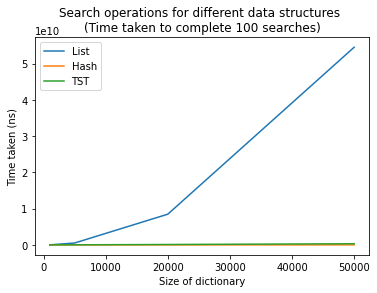

In [89]:
inputs = [50000, 20000, 5000, 1000]
plt.plot(inputs, list_search_execution_time, label='List')
plt.plot(inputs, hash_search_execution_time, label='Hash')
plt.plot(inputs, tst_search_execution_time, label='TST')
plt.title("Search operations for different data structures \n(Time taken to complete 100 searches)")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

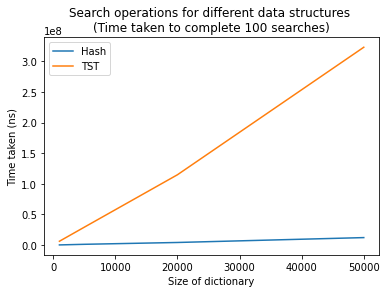

In [88]:
plt.plot(inputs, hash_search_execution_time, label='Hash')
plt.plot(inputs, tst_search_execution_time, label='TST')
plt.title("Search operations for different data structures \n(Time taken to complete 100 searches)")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

In [82]:
print(list_search_execution_time, hash_search_execution_time, tst_search_execution_time)

[54481271400, 8470341200, 525621200, 20915700] [11964600, 3988300, 997400, 0] [323132300, 114688200, 28946000, 5983700]


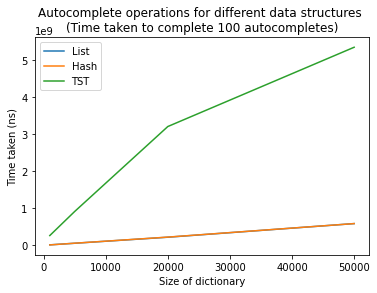

In [85]:
inputs = [50000, 20000, 5000, 1000]
plt.plot(inputs, list_auto_execution_time, label='List')
plt.plot(inputs, hash_auto_execution_time, label='Hash')
plt.plot(inputs, tst_auto_execution_time, label='TST')
plt.title("Autocomplete operations for different data structures \n(Time taken to complete 100 autocompletes)")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

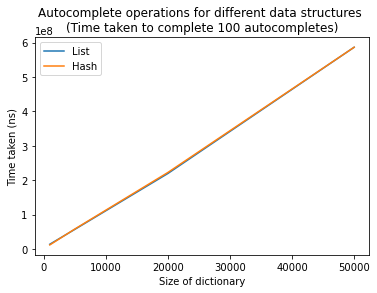

In [86]:
inputs = [50000, 20000, 5000, 1000]
plt.plot(inputs, list_auto_execution_time, label='List')
plt.plot(inputs, hash_auto_execution_time, label='Hash')
plt.title("Autocomplete operations for different data structures \n(Time taken to complete 100 autocompletes)")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

In [87]:
print(list_auto_execution_time, hash_auto_execution_time, tst_auto_execution_time) 

[586434400, 219414000, 56820100, 13963900] [586431200, 222405500, 57845400, 11992000] [5335852100, 3200415500, 911537800, 264269800]
